In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
x_data = np.linspace(0.0,10.0,1000000)

In [4]:
noise = np.random.randn(len(x_data))

In [5]:
noise.shape

(1000000,)

y = mx + b

b = 5

In [6]:
 y_true = (0.5 * x_data) + 5 + noise

In [7]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [8]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [9]:
y_df.head()

,Y
0,4.645626
1,5.633458
2,5.398477
3,6.022786
4,4.882755


In [10]:
my_data = pd.concat([x_df,y_df], axis=1)

In [11]:
my_data.head()

,X Data,Y
0,0.00000,4.645626
1,0.00001,5.633458
2,0.00002,5.398477
3,0.00003,6.022786
4,0.00004,4.882755


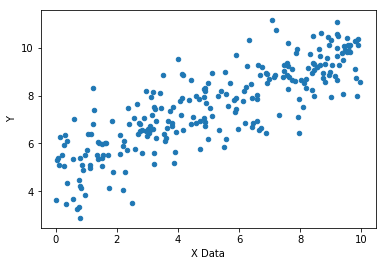

In [12]:
my_data.sample(250).plot(kind='scatter',x='X Data', y='Y')

In [13]:
batch_size = 8

In [14]:
np.random.randn(2)

array([0.44637989, 2.56567817])

In [15]:
m = tf.Variable(0.68)
b = tf.Variable(1.07)

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
xph = tf.placeholder(tf.float32,[batch_size])

In [17]:
yph = tf.placeholder(tf.float32,[batch_size])

In [18]:
y_model = m*xph + b

In [19]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [20]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [21]:
init = tf.global_variables_initializer()

In [22]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        
        rand_int = np.random.randint(len(x_data), size=batch_size)
        
        feed = {xph:x_data[rand_int], yph:y_true[rand_int]}
        
        sess.run(train, feed_dict=feed)
        
    model_m, model_b = sess.run([m,b])

In [23]:
model_m

0.47185177

In [24]:
model_b

5.0155663

In [25]:
y_hat = model_m*x_data + model_b

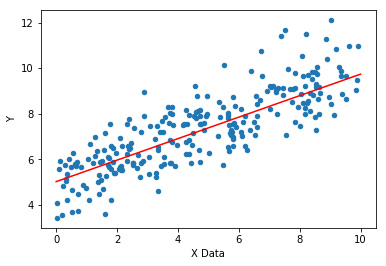

In [26]:
my_data.sample(250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(x_data, y_hat, 'r')

# TF ESTIMATOR

In [29]:
feat_cols = [ tf.feature_column.numeric_column('x', shape=[1]) ]

In [30]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/2d/29b083p92c546v8fprd0v3mw0000gn/T/tmpzzlcn2iv', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1327240f0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size=0.3, random_state=101)

In [34]:
print(x_train.shape)

(700000,)


In [35]:
print(x_eval.shape)

(300000,)


In [37]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size=8, num_epochs=None, shuffle=True)

In [38]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size=8, num_epochs=1000, shuffle=False)

In [39]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval}, y_eval, batch_size=8, num_epochs=1000, shuffle=False)

In [40]:
estimator.train(input_fn=input_func, steps=1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/2d/29b083p92c546v8fprd0v3mw0000gn/T/tmpzzlcn2iv/model.ckpt.
INFO:tensorflow:loss = 355.08014, step = 1
INFO:tensorflow:global_step/sec: 1018.14
INFO:tensorflow:loss = 11.331636, step = 101 (0.100 sec)
INFO:tensorflow:global_step/sec: 1067.28
INFO:tensorflow:loss = 9.578318, step = 201 (0.092 sec)
INFO:tensorflow:global_step/sec: 1391.38
INFO:tensorflow:loss = 6.139268, step = 301 (0.072 sec)
INFO:tensorf

In [41]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-22T07:43:32Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /var/folders/2d/29b083p92c546v8fprd0v3mw0000gn/T/tmpzzlcn2iv/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-06-22-07:43:33
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.060369, global_step = 1000, label/

In [42]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-22T07:44:47Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/2d/29b083p92c546v8fprd0v3mw0000gn/T/tmpzzlcn2iv/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-06-22-07:44:48
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0600774, global_step = 1000, label/mean = 7.473538, loss = 8.480619, prediction/mean = 7.2814665
INFO:tensorflow:Saving '

In [43]:
print('TRAINING DATA METRICS')
print(train_metrics)

TRAINING DATA METRICS
{'average_loss': 1.060369, 'label/mean': 7.4979777, 'loss': 8.482952, 'prediction/mean': 7.301891, 'global_step': 1000}


In [44]:
print('EVAL METRICS')
print(eval_metrics)

EVAL METRICS
{'average_loss': 1.0600774, 'label/mean': 7.473538, 'loss': 8.480619, 'prediction/mean': 7.2814665, 'global_step': 1000}


In [45]:
 brand_new_data = np.linspace(0,10,10)

In [46]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [47]:
estimator.predict(input_fn=input_fn_predict)

<generator object EstimatorV2.predict at 0x132e85b88>

In [48]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/2d/29b083p92c546v8fprd0v3mw0000gn/T/tmpzzlcn2iv/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.4745617], dtype=float32)},
 {'predictions': array([5.102575], dtype=float32)},
 {'predictions': array([5.730588], dtype=float32)},
 {'predictions': array([6.358601], dtype=float32)},
 {'predictions': array([6.986614], dtype=float32)},
 {'predictions': array([7.6146274], dtype=float32)},
 {'predictions': array([8.2426405], dtype=float32)},
 {'predictions': array([8.870653], dtype=float32)},
 {'predictions': array([9.498667], dtype=float32)},
 {'predictions': array([10.12668], dtype=float32)}]

In [49]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/2d/29b083p92c546v8fprd0v3mw0000gn/T/tmpzzlcn2iv/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [50]:
predictions

[array([4.4745617], dtype=float32),
 array([5.102575], dtype=float32),
 array([5.730588], dtype=float32),
 array([6.358601], dtype=float32),
 array([6.986614], dtype=float32),
 array([7.6146274], dtype=float32),
 array([8.2426405], dtype=float32),
 array([8.870653], dtype=float32),
 array([9.498667], dtype=float32),
 array([10.12668], dtype=float32)]

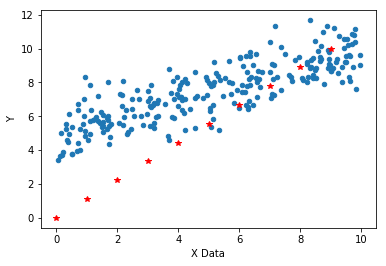

In [55]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(brand_new_data, 'r*')